<a href="https://colab.research.google.com/github/wangechi-wq/CLUSTERING-FOR-THE-IRIS-DATASET/blob/main/Predicting_the_optimum_number_of_clusters_for_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the dataset


In [12]:
#importing the dataset
iris = pd.read_csv("/content/Iris.csv")

In [13]:
#checking the first 3 rows of the dataset
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [14]:
#checking the last 3 rows of the dataset
iris.tail(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
#checking the size of the dataset
iris.shape

(150, 6)

In [16]:
#checking the datatypes
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Data Cleaning

In [17]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are 3 categories of iris species

## Data Cleaning

In [22]:
# dropping the id column because it is not necessary for our analysis
iris.drop(["Id"],axis=1,inplace=True)


In [23]:
#checking for any missing values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

there are no missing values in the dataset

In [25]:
# checking the columns
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
# checking the numeric values

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
# checking the descriptive statistics of the dataset

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


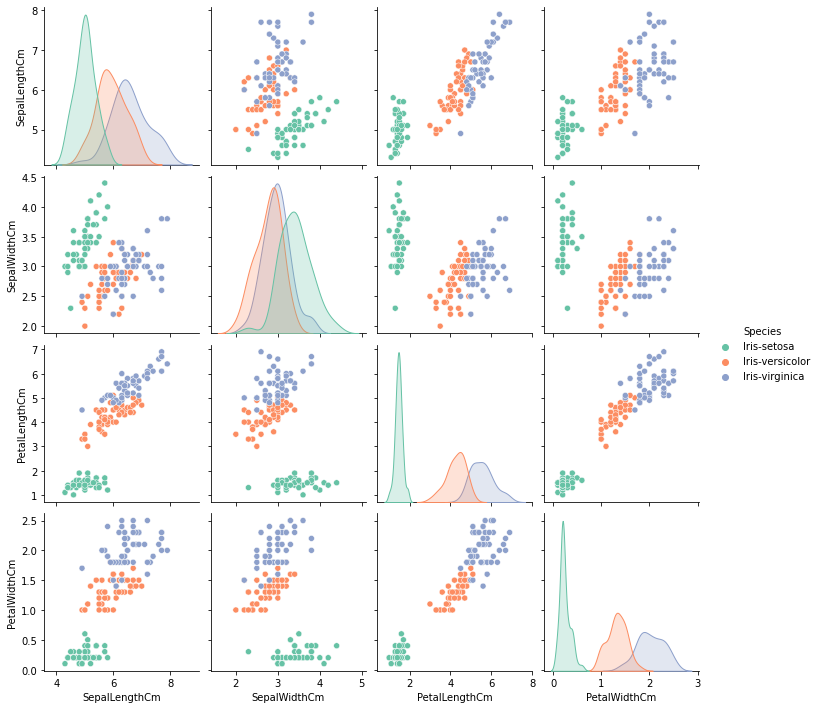

In [29]:
# plotting the species iris_features
sns.pairplot(data=iris,hue="Species",palette="Set2")
plt.show()

In [34]:
iris_features = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=99)    # 99 CLUSTERS

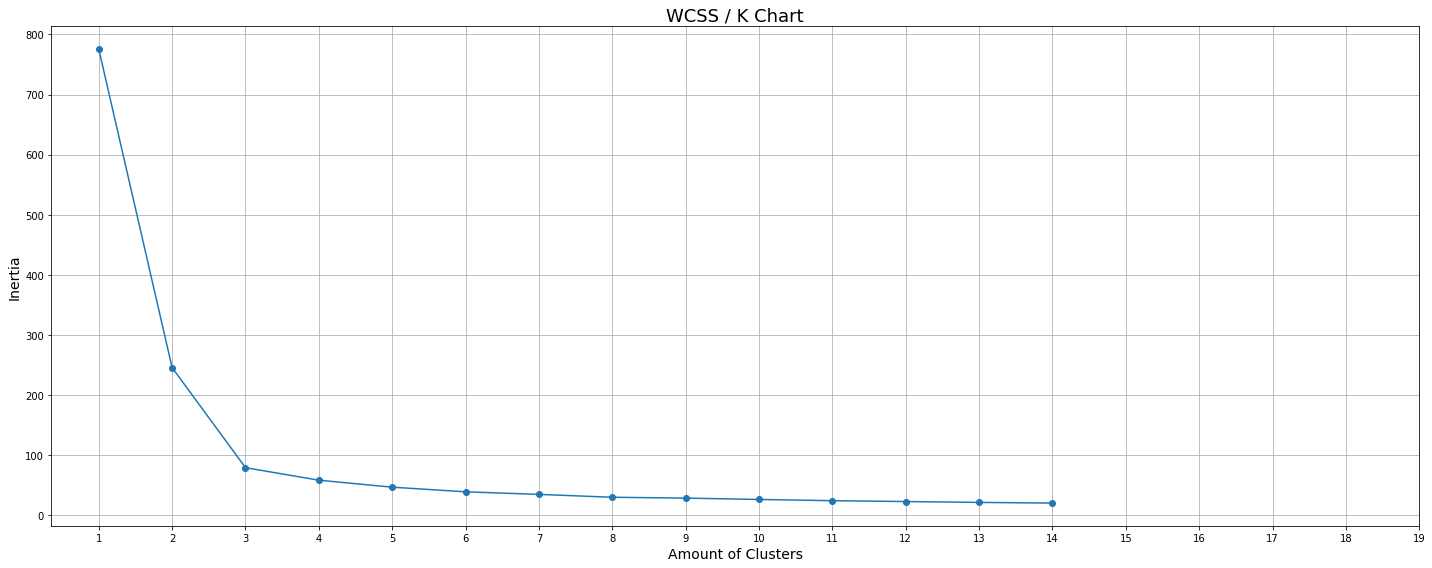

In [38]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

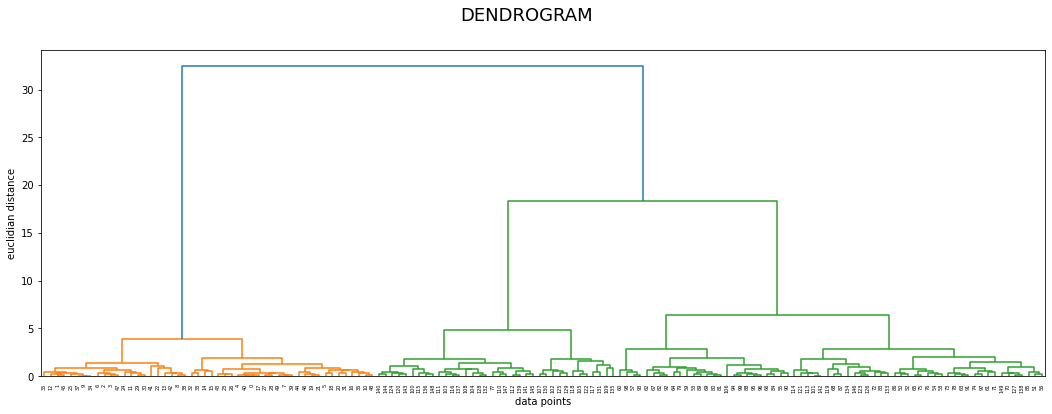

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(iris_features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

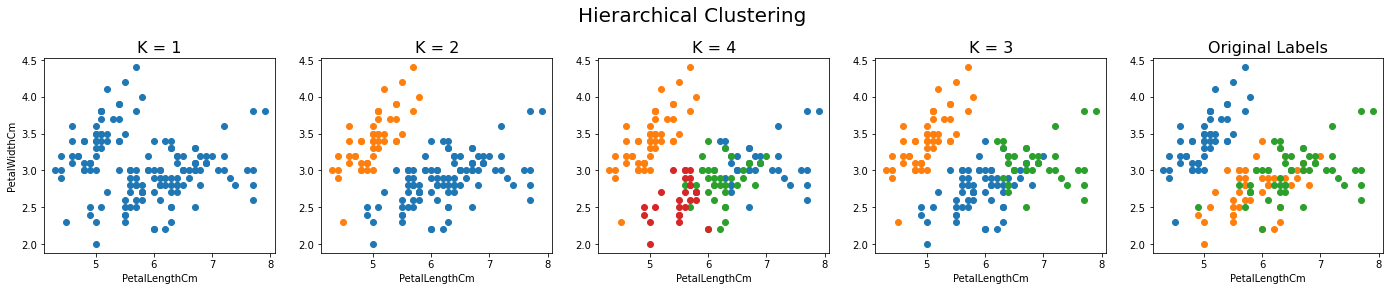

In [40]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(iris_features.SepalLengthCm,iris_features.SepalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
iris_features["labels"] = hc_cluster.fit_predict(iris_features)
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 0],iris_features.SepalWidthCm[iris_features.labels == 0])
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 1],iris_features.SepalWidthCm[iris_features.labels == 1])

# I drop labels since we only want to use iris_features.
iris_features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
iris_features["labels"] = hc_cluster.fit_predict(iris_features)
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 0],iris_features.SepalWidthCm[iris_features.labels == 0])
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 1],iris_features.SepalWidthCm[iris_features.labels == 1])
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 2],iris_features.SepalWidthCm[iris_features.labels == 2])
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 3],iris_features.SepalWidthCm[iris_features.labels == 3])

# I drop labels since we only want to use iris_features.
iris_features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
iris_features["labels"] = hc_cluster.fit_predict(iris_features)
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 0],iris_features.SepalWidthCm[iris_features.labels == 0])
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 1],iris_features.SepalWidthCm[iris_features.labels == 1])
plt.scatter(iris_features.SepalLengthCm[iris_features.labels == 2],iris_features.SepalWidthCm[iris_features.labels == 2])


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(iris.SepalLengthCm[iris.Species == "Iris-setosa"],iris.SepalWidthCm[iris.Species == "Iris-setosa"])
plt.scatter(iris.SepalLengthCm[iris.Species == "Iris-versicolor"],iris.SepalWidthCm[iris.Species == "Iris-versicolor"])
plt.scatter(iris.SepalLengthCm[iris.Species == "Iris-virginica"],iris.SepalWidthCm[iris.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()


## Evaluating the Results and Comparing them

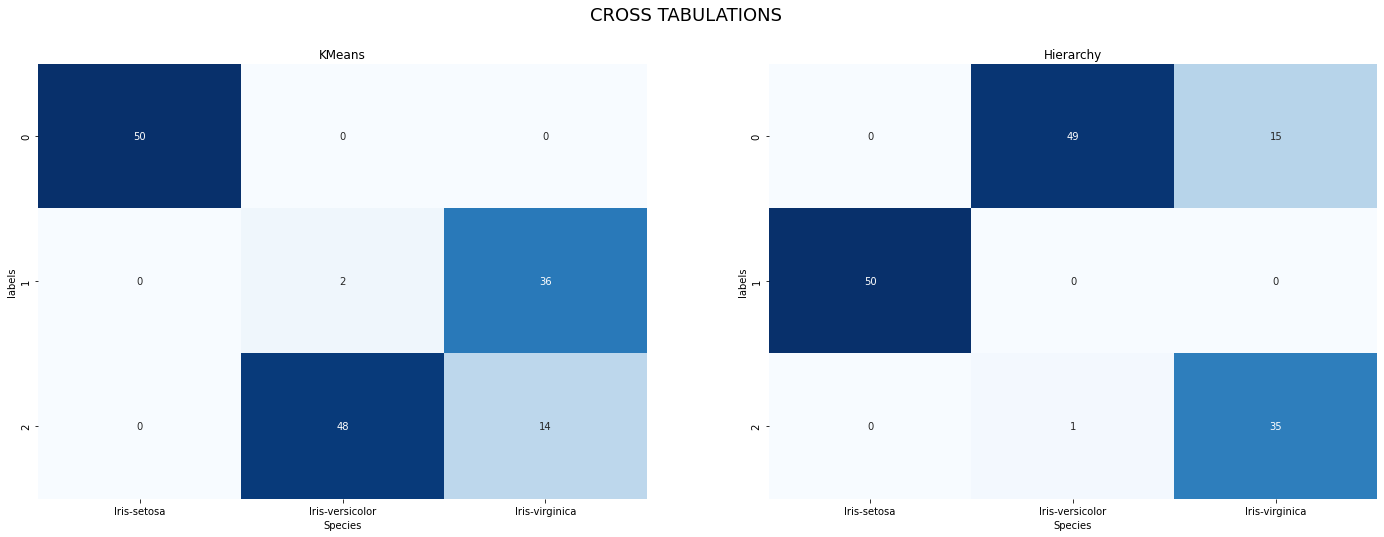

In [41]:
# I drop labels since we only want to use features.
iris_features.drop(["labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(iris_features)

# cross tabulation table for kmeans
iris1 = pd.DataFrame({'labels':kmeans_predict,"Species":iris['Species']})
ct1 = pd.crosstab(iris1['labels'],iris1['Species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(iris_features)

# cross tabulation table for Hierarchy
iris2 = pd.DataFrame({'labels':hc_predict,"Species":iris['Species']})
ct2 = pd.crosstab(iris2['labels'],iris2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

The both Failed on 16 data points over 150 data points, which is equal to 90%¶
We also see that clustering "iris-setosa" was easy for both of them (50/50 success) because it's data points are all easily differentiable
15 mistakes of all 16 is coming from "iris-virginica". Which shows that it was hard to cluster for my models.